In [84]:
from typing import List

import igraph as ig
import networkx as nx
import scipy as sp
import scipy.io  # for mmread() and mmwrite()
import io  # Use BytesIO as a stand-in for a Python file object
import os
import numpy as np
import random

import matplotlib.pyplot as plt
plt.style.use('default')

In [85]:
kar = ig.Graph.Famous('Zachary')
ig.summary(kar)

IGRAPH U--- 34 78 -- 


In [101]:
random.seed(22)
communities = kar.community_multilevel()
print(communities)
colors = np.array(['#FFD700', '#DA70D6', '#98FB98', '#87CEFA'])
community_colors = [colors[community] for community in communities.membership]

Clustering with 34 elements and 4 clusters
[0] 0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33
[3] 24, 25, 28, 31


In [222]:
layout = kar.layout("auto")
positions = {v.index: layout[v.index] for v in kar.vs}
positions[16] = (0.5, 3)
print(positions[21])
positions[25] = (1.2, 0)
positions[24] = (1, 0.5)
positions[18] = (-1.6, -1.3)
positions[15] = (-1.5, -1.7)
positions[17] = (-1.6, 1.3)
positions[28] = (0.48, -1.3)
positions[20] = (-1.3, -2)
positions[9] = (-0.2, -0.8)
positions[28] = (0.2, -0.9)
positions[23] = (0, -1.4)
positions[29] = (-0.14, -1.9)
positions[4] = (1, 1.7)
positions[5] = (-0.1, 2.3)
positions[11] = (-0.7, 2)
positions[21] = (-1.2, 1.8)



[-1.518493490803143, 1.973095774922378]


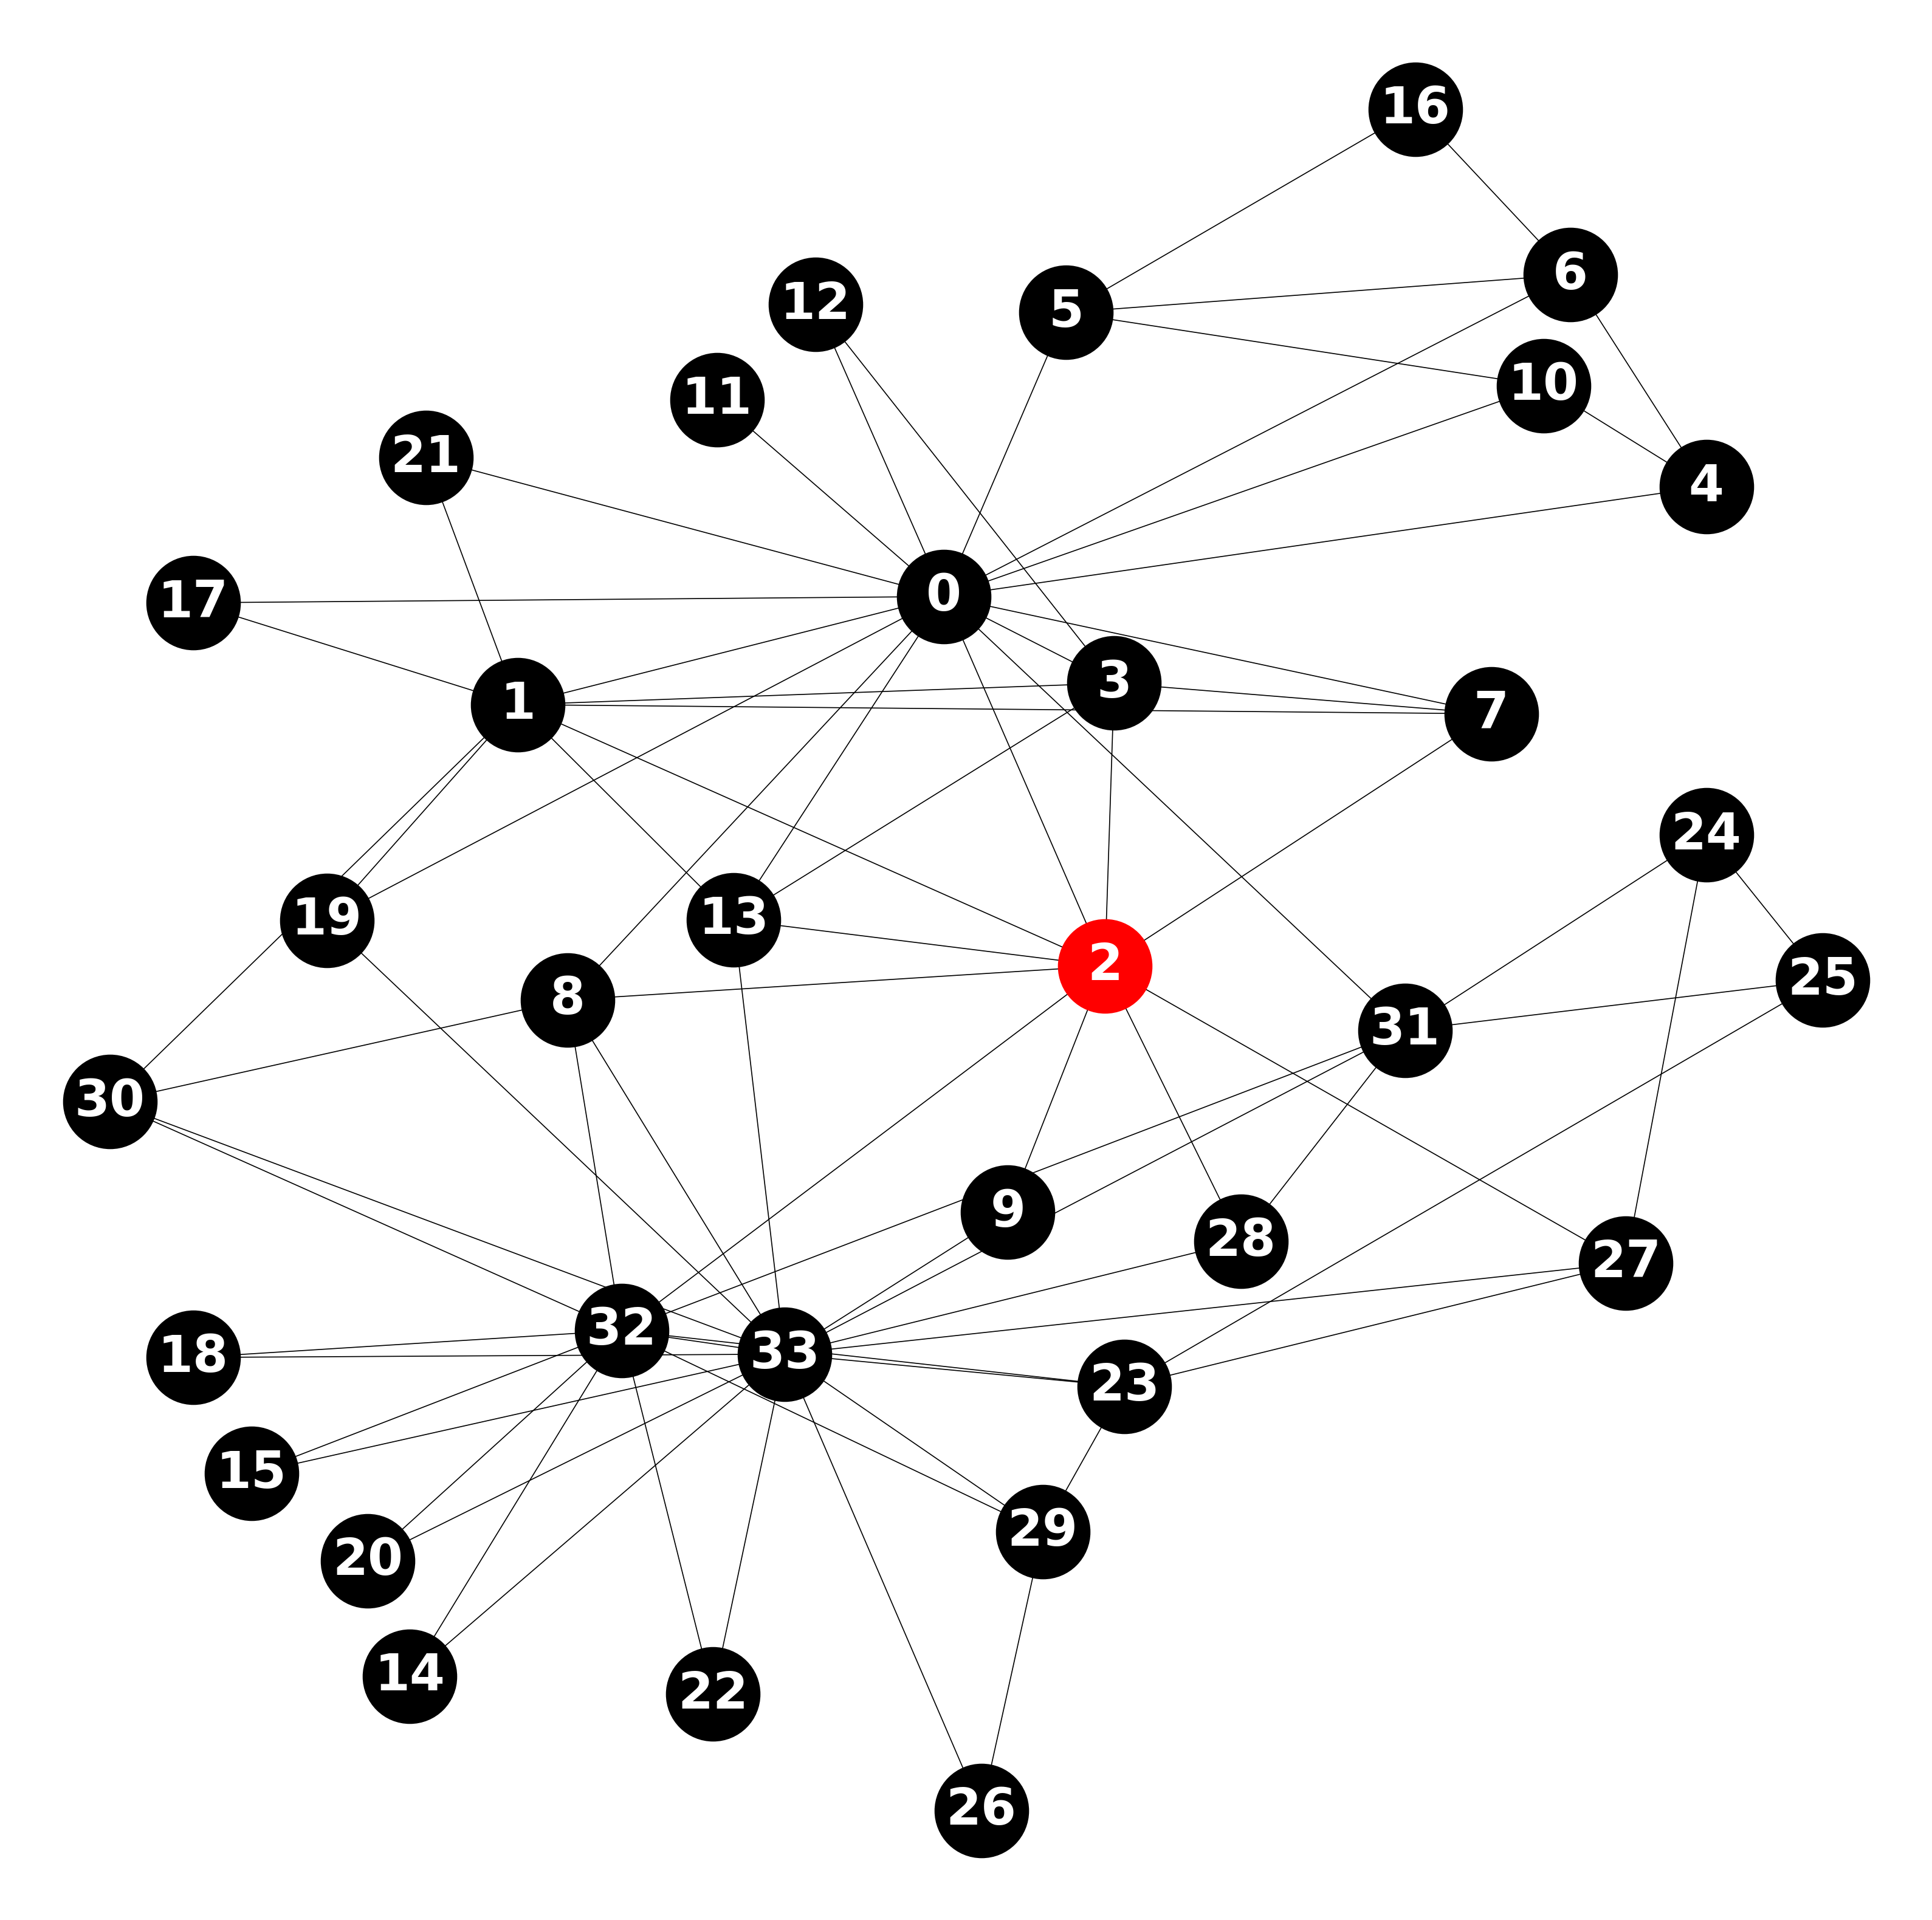

"\n#IGRAPH version\nfig, ax = plt.subplots(figsize=(10, 10))\nvertex_colors = ['#000000'] * len(kar.vs)\nvertex_colors[2] = '#FF0000'\n\nig.plot(\n    kar, \n    layout=layout,\n    vertex_label=[v.index for v in kar.vs],\n    vertex_size=27,\n    vertex_color=vertex_colors,  \n    #vertex_frame_color=vertex_colors, \n    #vertex_frame_width=2,\n    edge_width=0.3,\n    vertex_label_color='white',\n    target=ax\n)\n"

In [231]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=400)
# Disegnare gli archi
for edge in kar.es:
    source, target = edge.tuple
    x_coords = [positions[source][0], positions[target][0]]
    y_coords = [positions[source][1], positions[target][1]]
    ax.plot(x_coords, y_coords, color='black', linewidth=0.3, zorder=1)

# Disegnare i nodi
vertex_colors = ['#000000'] * len(kar.vs)
vertex_colors[2] = '#FF0000'  # Colore del nodo specifico

for v in kar.vs:
    x, y = positions[v.index]
    ax.scatter(x, y, color=vertex_colors[v.index], s=27**2, zorder=2)  # s è l'area

# Aggiungere etichette ai nodi
for v in kar.vs:
    x, y = positions[v.index]
    ax.text(x, y, str(v.index), color='white', ha='center', va='center', fontsize=15, fontdict={'family': 'sans-serif', 'weight': 'bold'}, zorder=3)

# Rimuovere assi
ax.axis('off')
plt.show()

"""
#IGRAPH version
fig, ax = plt.subplots(figsize=(10, 10))
vertex_colors = ['#000000'] * len(kar.vs)
vertex_colors[2] = '#FF0000'

ig.plot(
    kar, 
    layout=layout,
    vertex_label=[v.index for v in kar.vs],
    vertex_size=27,
    vertex_color=vertex_colors,  
    #vertex_frame_color=vertex_colors, 
    #vertex_frame_width=2,
    edge_width=0.3,
    vertex_label_color='white',
    target=ax
)
"""

In [246]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=400)

# Disegna gli archi
for edge in kar.es:
    source, target = edge.tuple
    x_coords = [positions[source][0], positions[target][0]]
    y_coords = [positions[source][1], positions[target][1]]
    ax.plot(x_coords, y_coords, color='black', linewidth=0.3, zorder=1)

# Disegna i nodi
for v in kar.vs:
    x, y = positions[v.index]
    # Disegna il bordo del nodo (frame color)
    ax.scatter(
        x, y, 
        color='red' if v.index == 2 else 'black',  # Colore del nodo
        edgecolor=community_colors[v.index],  # Colore del frame
        linewidth=4,  # Spessore del bordo
        s=35**2,  # Dimensione proporzionale al quadrato di vertex_size
        zorder=2
    )

# Aggiungi le etichette dei nodi
for v in kar.vs:
    x, y = positions[v.index]
    ax.text(x, y, str(v.index), color='white', ha='center', va='center', fontsize=18, fontdict={'family': 'sans-serif', 'weight': 'bold'}, zorder=3)

# Rimuovi gli assi
ax.axis('off')
plt.show()

"""
#IGRAPH version
# Disegno del grafo
fig, ax = plt.subplots(figsize=(10, 10))

ig.plot(
    kar, 
    layout=layout,
    vertex_label=[v.index for v in kar.vs],
    vertex_size=25,
    vertex_color='black',
    vertex_frame_color=community_colors,
    vertex_frame_width=2, 
    edge_width=0.2,
    vertex_label_color='white',
    target=ax
)
"""

"\n#IGRAPH version\n# Disegno del grafo\nfig, ax = plt.subplots(figsize=(10, 10))\n\nig.plot(\n    kar, \n    layout=layout,\n    vertex_label=[v.index for v in kar.vs],\n    vertex_size=25,\n    vertex_color='black',\n    vertex_frame_color=community_colors,\n    vertex_frame_width=2, \n    edge_width=0.2,\n    vertex_label_color='white',\n    target=ax\n)\n"

In [226]:
new_kar = kar.copy()
new_kar.add_edges([(2, 23)])
new_kar.delete_edges([(2, 7), (2, 13)])

In [248]:
temp_kar = kar.copy()
temp_kar.add_edges([(2, 23)])

# Configurazione colori dei nodi
vertex_colors = ['#000000'] * len(temp_kar.vs)
vertex_colors[2] = '#FF0000'  # Nodo evidenziato

# Configurazione colori, stili e larghezze degli archi
highlighted_edges = [(2, 7), (2, 13)]
edge_colors = ['#000000'] * len(temp_kar.es)
edge_styles = ['solid'] * len(temp_kar.es)
edge_widths = [0.3] * len(temp_kar.es)

# Evidenzia gli archi
for edge in highlighted_edges:
    idx = temp_kar.get_eid(edge[0], edge[1])
    edge_colors[idx] = '#FF0000'  # Rosso
    edge_widths[idx] = 2

# Configura il nuovo arco
new_edge_idx = temp_kar.get_eid(2, 23)
edge_colors[new_edge_idx] = '#008000'  # Verde
edge_styles[new_edge_idx] = (0, (5, 2))
edge_widths[new_edge_idx] = 2

# Disegno del grafo
fig, ax = plt.subplots(figsize=(10, 10), dpi=400)

# Disegna gli archi
for edge in temp_kar.es:
    source, target = edge.tuple
    x_coords = [positions[source][0], positions[target][0]]
    y_coords = [positions[source][1], positions[target][1]]
    ax.plot(
        x_coords, y_coords, 
        color=edge_colors[edge.index],
        linewidth=edge_widths[edge.index],
        linestyle=edge_styles[edge.index],
        zorder=1
    )

# Disegna i nodi
for v in temp_kar.vs:
    x, y = positions[v.index]
    ax.scatter(
        x, y, 
        color=vertex_colors[v.index], 
        edgecolor='red' if v.index == 2 else 'black', 
        linewidth=0.5,
        s=35**2, 
        zorder=2
    )

# Aggiungi le etichette dei nodi
for v in temp_kar.vs:
    x, y = positions[v.index]
    ax.text(x, y, str(v.index), color='white', ha='center', va='center', fontsize=18, fontdict={'family': 'sans-serif', 'weight': 'bold'}, zorder=3)

# Rimuovi assi
ax.axis('off')
plt.show()

"""
IGRAPH version
# Disegno del grafo
temp_kar = kar.copy()
temp_kar.add_edges([(2, 23)])
fig, ax = plt.subplots(figsize=(10, 10))
vertex_colors = ['#000000'] * len(kar.vs)
vertex_colors[2] = '#FF0000'

highlighted_edges = [(2, 7), (2, 13)]
edge_colors = ['#000000'] * len(temp_kar.es)
edge_styles = ['solid'] * len(temp_kar.es)

for edge in highlighted_edges:
    idx = temp_kar.get_eid(edge[0], edge[1])
    edge_colors[idx] = '#FF0000'

# Add the new edge (2, 23) with a dashed green line
new_edge_idx = temp_kar.get_eid(2, 23)
edge_colors[new_edge_idx] = '#00FF00'
edge_styles[new_edge_idx] = 'dashed'

# Set edge width to 1 for the three special edges
edge_widths = [0.3] * len(temp_kar.es)
for edge in highlighted_edges + [(2, 23)]:
    idx = temp_kar.get_eid(edge[0], edge[1])
    edge_widths[idx] = 1

ig.plot(
    temp_kar, 
    layout=layout,
    vertex_label=[v.index for v in kar.vs],
    vertex_size=27,
    vertex_color=vertex_colors,  
    edge_color=edge_colors,
    edge_width=edge_widths,
    edge_style=edge_styles,
    vertex_label_color='white',
    target=ax
)
"""

"\nIGRAPH version\n# Disegno del grafo\ntemp_kar = kar.copy()\ntemp_kar.add_edges([(2, 23)])\nfig, ax = plt.subplots(figsize=(10, 10))\nvertex_colors = ['#000000'] * len(kar.vs)\nvertex_colors[2] = '#FF0000'\n\nhighlighted_edges = [(2, 7), (2, 13)]\nedge_colors = ['#000000'] * len(temp_kar.es)\nedge_styles = ['solid'] * len(temp_kar.es)\n\nfor edge in highlighted_edges:\n    idx = temp_kar.get_eid(edge[0], edge[1])\n    edge_colors[idx] = '#FF0000'\n\n# Add the new edge (2, 23) with a dashed green line\nnew_edge_idx = temp_kar.get_eid(2, 23)\nedge_colors[new_edge_idx] = '#00FF00'\nedge_styles[new_edge_idx] = 'dashed'\n\n# Set edge width to 1 for the three special edges\nedge_widths = [0.3] * len(temp_kar.es)\nfor edge in highlighted_edges + [(2, 23)]:\n    idx = temp_kar.get_eid(edge[0], edge[1])\n    edge_widths[idx] = 1\n\nig.plot(\n    temp_kar, \n    layout=layout,\n    vertex_label=[v.index for v in kar.vs],\n    vertex_size=27,\n    vertex_color=vertex_colors,  \n    edge_color=e

In [228]:
random.seed(22)
new_communities = new_kar.community_multilevel()
print(new_communities)
community_color_map = {
    0: colors[0],  
    1: colors[3],  
    2: colors[1],  
    3: colors[2]   
}

new_community_colors = [community_color_map[community % len(community_color_map)] for community in new_communities.membership]

Clustering with 34 elements and 4 clusters
[0] 0, 1, 3, 7, 11, 12, 13, 17, 19, 21
[1] 2, 9, 23, 24, 25, 27, 28, 31
[2] 4, 5, 6, 10, 16
[3] 8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33


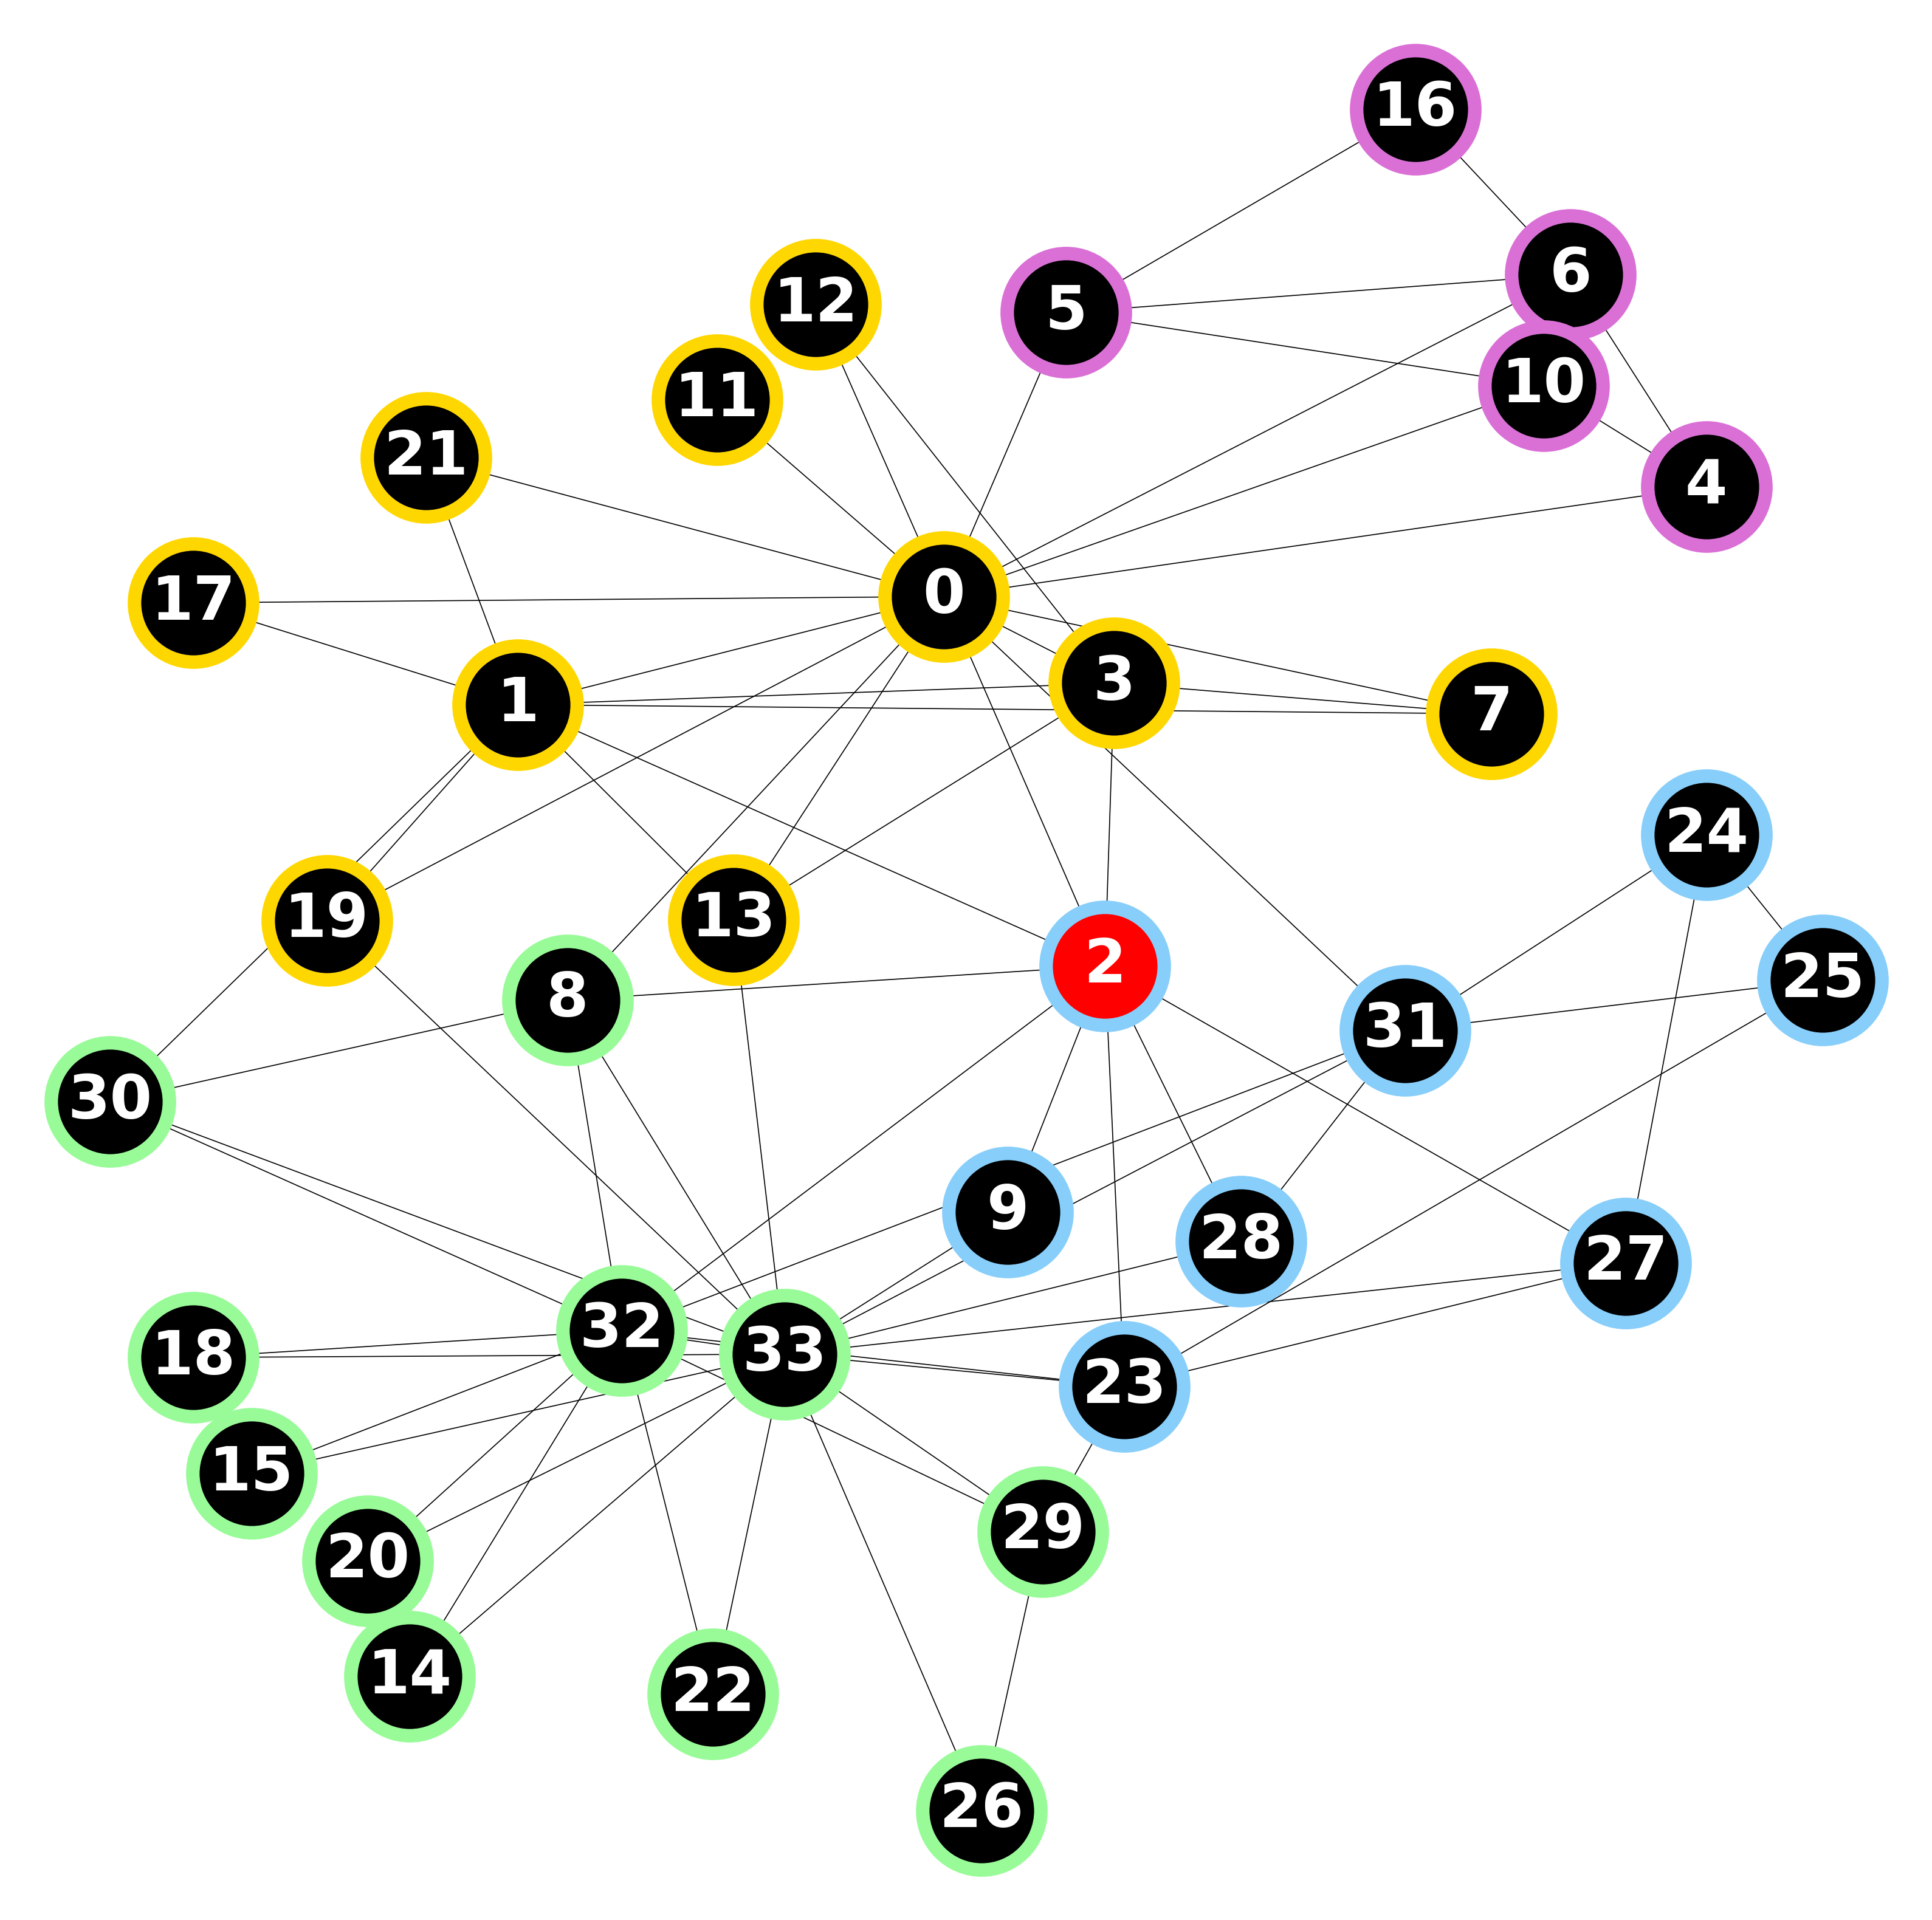

In [249]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=400)

# Disegna gli archi
for edge in new_kar.es:
    source, target = edge.tuple
    x_coords = [positions[source][0], positions[target][0]]
    y_coords = [positions[source][1], positions[target][1]]
    ax.plot(x_coords, y_coords, color='black', linewidth=0.3, zorder=1)

# Disegna i nodi
for v in new_kar.vs:
    x, y = positions[v.index]
    # Disegna il bordo del nodo (frame color)
    ax.scatter(
        x, y, 
        color='red' if v.index == 2 else 'black',  # Colore del nodo
        edgecolor=new_community_colors[v.index],  # Colore del frame
        linewidth=4,  # Spessore del bordo
        s=35**2,  # Dimensione proporzionale al quadrato di vertex_size
        zorder=2
    )

# Aggiungi le etichette dei nodi
for v in new_kar.vs:
    x, y = positions[v.index]
    ax.text(x, y, str(v.index), color='white', ha='center', va='center', fontsize=18, fontdict={'family': 'sans-serif', 'weight': 'bold'}, zorder=3)

# Rimuovi gli assi
ax.axis('off')
plt.show()